# 와인 데이터
# 주성분 분석(PCA)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA ## 대문자니까 클래스이다
wine = load_wine()
from sklearn.preprocessing import StandardScaler
wine.std = StandardScaler().fit_transform(wine.data) # 표준 정규분포로 전환
from sklearn.decomposition import PCA ## 대문자니까 클래스이다
pca = PCA(n_components=4) # 주성분을 몇개로 할거냐 회귀선 두개로 할거다. 

In [47]:
pca2 = PCA(n_components=2)

In [48]:
wine_pca2 = pca2.fit_transform(wine.std) # 데이터 변환을 해주는것은 핏 트랜스 폼이다
pca2.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [54]:
wine_pca = pca.fit_transform(wine.std) # 데이터 변환을 해주는것은 핏 트랜스 폼이다
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

PCA 전후 분류

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
## 원본데이터
X_train,X_test,y_train,y_test = train_test_split(
 wine.data,wine.target,stratify=wine.target,random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

1.0

In [44]:
## PCA 데이터(2차원)로 분류 
X_train,X_test,y_train,y_test = train_test_split(
 wine_pca2,wine.target,stratify=wine.target,random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9111111111111111

In [58]:
## PCA 데이터(4차원)로 분류 
X_train,X_test,y_train,y_test = train_test_split(
 wine_pca,wine.target,stratify=wine.target,random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9555555555555556

- PCA 데이터 시각화

In [63]:
df = pd.DataFrame(wine_pca2, columns=['PC1','PC2'])
df['target'] = wine.target
df.head(5)

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


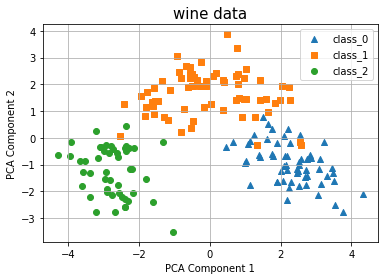

In [62]:
markers = ['^','s','o'] # Setosa-세모 , Versicolor-네모 , virginica-동그라미
df['PC1'] = wine_pca[:,0]
df['PC2'] = wine_pca[:,1]
df.head(3)

for i,marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,
                label=wine.target_names[i])
plt.legend() # 범례
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.title('wine data',fontsize = 15)
plt.grid()
plt.show()